# Part 3. (CA2.Data_Analystic)

# European  dataset                

In [2]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# EU Price of Crops in Euros

In [3]:
europeagri_consumer = pd.read_csv('tag00044_linear.csv')

europeagri_consumer.head()

,DATAFLOW,LAST UPDATE,freq,unit,meatitem,meat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2015,8.70,NaN
1,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2016,11.37,NaN
2,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2017,10.29,NaN
3,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2018,7.34,NaN
4,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,AL,2019,5.61,NaN


In [4]:
europeagri_consumer.tail()

,DATAFLOW,LAST UPDATE,freq,unit,meatitem,meat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
432,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,XK,2015,11.26,NaN
433,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,XK,2016,13.73,NaN
434,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,XK,2017,12.73,NaN
435,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,XK,2018,16.35,NaN
436,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,XK,2019,16.12,NaN


In [5]:
europeagri_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     437 non-null    object 
 1   LAST UPDATE  437 non-null    object 
 2   freq         437 non-null    object 
 3   unit         437 non-null    object 
 4   meatitem     437 non-null    object 
 5   meat         437 non-null    object 
 6   geo          437 non-null    object 
 7   TIME_PERIOD  437 non-null    int64  
 8   OBS_VALUE    425 non-null    float64
 9   OBS_FLAG     47 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 34.3+ KB


In [6]:
#changing the datatype of Value from object to a float must be careful to check if there are no numbers in the column they
#will be come NAN
europeagri_consumer['OBS_VALUE'] = pd.to_numeric(europeagri_consumer['OBS_VALUE'],errors = 'coerce')

In [7]:
print(europeagri_consumer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     437 non-null    object 
 1   LAST UPDATE  437 non-null    object 
 2   freq         437 non-null    object 
 3   unit         437 non-null    object 
 4   meatitem     437 non-null    object 
 5   meat         437 non-null    object 
 6   geo          437 non-null    object 
 7   TIME_PERIOD  437 non-null    int64  
 8   OBS_VALUE    425 non-null    float64
 9   OBS_FLAG     47 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 34.3+ KB
None


In [8]:

# inspect description of variables
europeagri_consumer.describe()

,TIME_PERIOD,OBS_VALUE
count,437.000000,425.000000
mean,2015.645309,625.228588
std,3.351031,1645.350126
min,2010.000000,0.540000
25%,2013.000000,14.470000
50%,2016.000000,71.930000
75%,2018.000000,452.120000
max,2021.000000,7931.690000


In [9]:
# inspect the shape of the dataset 
europeagri_consumer.shape

(437, 10)

In [10]:

europeagri_consumer.dtypes

DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
meatitem        object
meat            object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
dtype: object

# Check for and Handle MIssing Values

In [11]:
# check all columns for NAN values if any
europeagri_consumer.isna().any()

DATAFLOW       False
LAST UPDATE    False
freq           False
unit           False
meatitem       False
meat           False
geo            False
TIME_PERIOD    False
OBS_VALUE       True
OBS_FLAG        True
dtype: bool

In [12]:
# check the sum of null records
europeagri_consumer.isnull().sum()

DATAFLOW         0
LAST UPDATE      0
freq             0
unit             0
meatitem         0
meat             0
geo              0
TIME_PERIOD      0
OBS_VALUE       12
OBS_FLAG       390
dtype: int64

<AxesSubplot:xlabel='OBS_VALUE'>

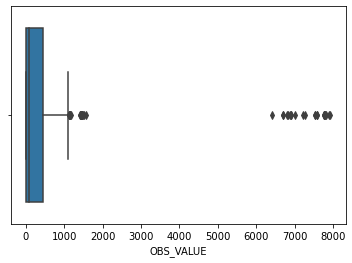

In [13]:
#Using boxplot to check for outliers in the feature Value
sns.boxplot(x=europeagri_consumer['OBS_VALUE'])